In [1]:
# Import sys, then tell python where to find the nEXO-specific classes
# I'll assume you're in the sensitivity/work directory, as shown here by !pwd

import sys
!pwd
sys.path.append('/g/g20/lenardo1/nEXO/sensitivity/modules')

/g/g20/lenardo1/nEXO/sensitivity/work/SensitivityPaper2020_notebooks


In [4]:
# Import useful libraries for analysis

import pandas as pd
import histlite as hl
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import LSQUnivariateSpline
import os

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (10,9)



In [3]:
# Import the nEXO sensitivity classes

import nEXOFitWorkspace
import nEXOFitModel
import nEXOFitLikelihood



# Getting the critical lambda curve (this is insensitive to the efficiency parameter)

In [5]:

data_dirs = ['/p/lustre1/lenardo1/sensitivity_output/March19_2020_critical_lambda_efficiency_5percent/']

data_dict_list = []
data_dict = dict()

In [6]:
for thisdir in data_dirs:
    print(thisdir)
    data_dict = dict()
    for filename in os.listdir(thisdir):
        if 'critical' in filename:
            counts_key = filename.split('_')[5]
            if counts_key in data_dict:
                data_dict[ counts_key ] = data_dict[ counts_key ].append( pd.read_hdf(thisdir + filename) )
            else:
                #print(counts_key)
                data_dict[ counts_key ] = pd.read_hdf(thisdir + filename)
    data_dict_list.append(data_dict)
            
    print('{} files loaded'.format(len(data_dict)))

/p/lustre1/lenardo1/sensitivity_output/March19_2020_critical_lambda_efficiency_5percent/
50 files loaded


Convergence rate: 3996/4000 (99.9%)


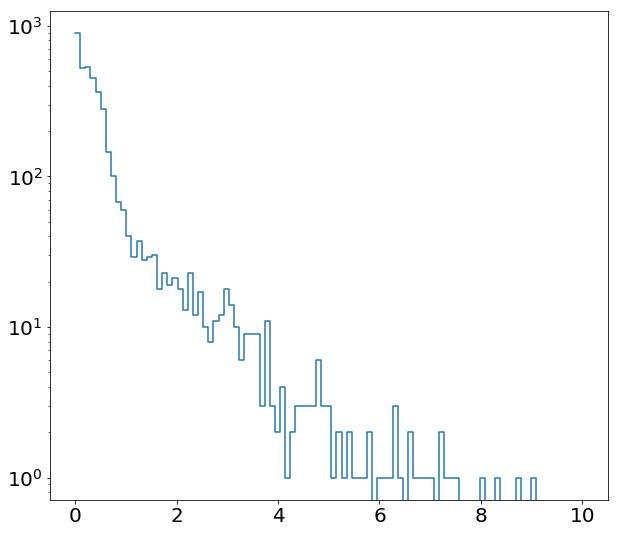

In [7]:
folder = 0
counts = '1.0'

mask = (data_dict_list[folder][counts]['fixed_fit_covar'] & data_dict_list[folder][counts]['best_fit_covar'])

print('Convergence rate: {}/{} ({:4.4}%)'.format( int(np.sum(mask)),len(mask),np.sum(mask)/len(mask)*100. ))

hlambdas = hl.hist( data_dict_list[folder][counts]['lambda'].loc[mask].values , bins=np.linspace(0.,10.,100) )

hl.plot1d(hlambdas)

plt.yscale('log')

Convergence rate: 3994/4000 (99.85%)


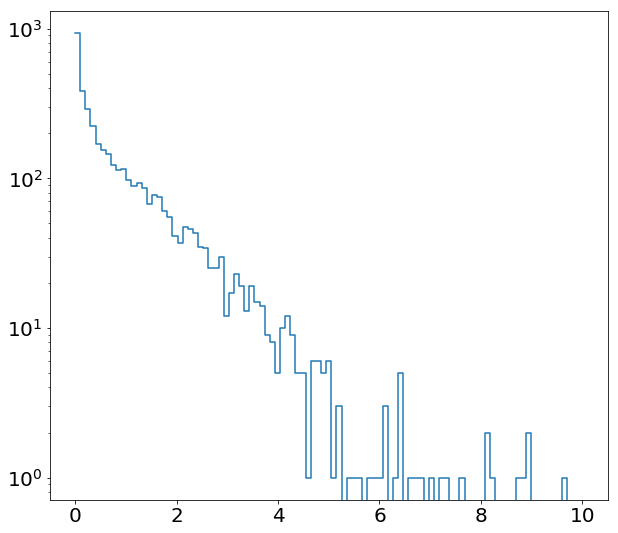

In [8]:
folder = 0
counts = '5.0'

mask = (data_dict_list[folder][counts]['fixed_fit_covar'] & data_dict_list[folder][counts]['best_fit_covar'])

print('Convergence rate: {}/{} ({:4.4}%)'.format( int(np.sum(mask)),len(mask),np.sum(mask)/len(mask)*100. ))

hlambdas = hl.hist( data_dict_list[folder][counts]['lambda'].loc[mask].values , bins=np.linspace(0.,10.,100) )

hl.plot1d(hlambdas)

plt.yscale('log')

(0.5, 3.5)

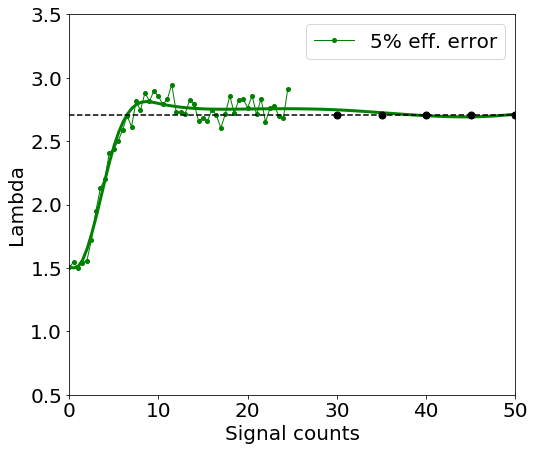

In [9]:
folder = 0

plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (8,7)

xcounts = dict()
ylambdas = dict()

if True:
    critical_lambda = []
    counts_array = []

    for counts, dataframe in data_dict_list[folder].items():
        mask = (dataframe['fixed_fit_covar'] & dataframe['best_fit_covar'])
        lambdas = data_dict_list[folder][counts]['lambda'].loc[mask].values
        lambdas_sorted = np.sort(lambdas)
        #print('Index of 90%CL: {}'.format(int(len(lambdas_sorted)*0.9)))
        critical_lambda.append( lambdas_sorted[ int(len(lambdas_sorted)*0.9) ] )
        counts_array.append(float(counts))
        
    critical_lambda = np.array(critical_lambda)
    counts_array = np.array((counts_array))
    sortidxs = np.argsort(counts_array)

    xcounts['5percent'] = counts_array[sortidxs]
    ylambdas['5percent'] = critical_lambda[sortidxs]

    

spline_xn = np.array([1., 5., 7., 10., 20., 30, 48.5]) # defines the locations of the knots
SplineFunc5 = LSQUnivariateSpline( np.append(xcounts['5percent'],[30.,35.,40.,45.,50.,55.]), \
                                  np.append(ylambdas['5percent'],[2.706,2.706,2.706,2.706,2.706,2.706]),\
                                  t = spline_xn,k=3) 
#SplineFunc3 = LSQUnivariateSpline(xcounts['3percent'],ylambdas['3percent'],t = spline_xn,k=3) 
#SplineFunc5 = LSQUnivariateSpline(xcounts['5percent'],ylambdas['5percent'],t = spline_xn,k=3) 
xspline = np.linspace(0.,50.,100)
    
    

plt.plot(xcounts['5percent'],ylambdas['5percent'],'-og',markersize=4,linewidth=1,label='5% eff. error')
plt.plot(xspline,SplineFunc5(xspline),'-g',linewidth=3)
plt.plot([30.,35.,40.,45.,50.,55.],[2.706,2.706,2.706,2.706,2.706,2.706],'ok',markersize=7)

plt.plot(xspline,np.ones(len(xspline))*2.706,'--k')
plt.xlabel('Signal counts')
plt.ylabel('Lambda')
plt.legend()

plt.xlim(0.,50.)
plt.ylim(0.5,3.5)    

# Let's see if the signal efficiency parameter does indeed inflate the profile-likelihood curve

In [185]:
# Create the workspace
workspace = nEXOFitWorkspace.nEXOFitWorkspace(config='../config/TUTORIAL_config.yaml')
workspace.LoadComponentsTableFromFile('../../tables/ComponentsTable_D-005_v25_2020-01-21.h5')
workspace.CreateGroupedPDFs()


Loading input data froma previously-generated components table....

Loaded dataframe with 130 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Histogram
	HistogramAxisNames
	Total Mass or Area
	Halflife
	SpecActiv
	SpecActivErr
	RawActiv
	RawActivErr
	Activity ID
	Expected Counts
	Expected Counts Err
	Expected Counts UL
	TotalHitEff_N
	TotalHitEff_K
	Group

Fit variables:
	['SS/MS', 'Energy (keV)', 'Standoff (mm)']

Creating grouped PDFs....
	Group:     	Expected Counts:
	Far        	        4882.22
	Vessel_U238 	       19053.03
	Vessel_Th232 	        2169.26
	Off        	      139350.25
	Internals_U238 	       46351.84
	Internals_Th232 	        8667.26
	FullTPC_Co60 	         216.19
	FullTPC_K40 	    32572615.75
	Rn222      	        9107.27
	FullLXeBb2n 	    27949377.02
	FullLXeBb0n 	           0.00
	Xe137      	          46.52
	Total Sum  	    60612486.34


Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting FullTPCCo60
Plotting FullTPCK40
Plotting Rn222
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.882e+03    False     None       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       1.905e+04    False     None       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      2.169e+03    False     None       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.635e+04    False     None       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   8.667e+03    False     None       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      216.2        False     None       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.25

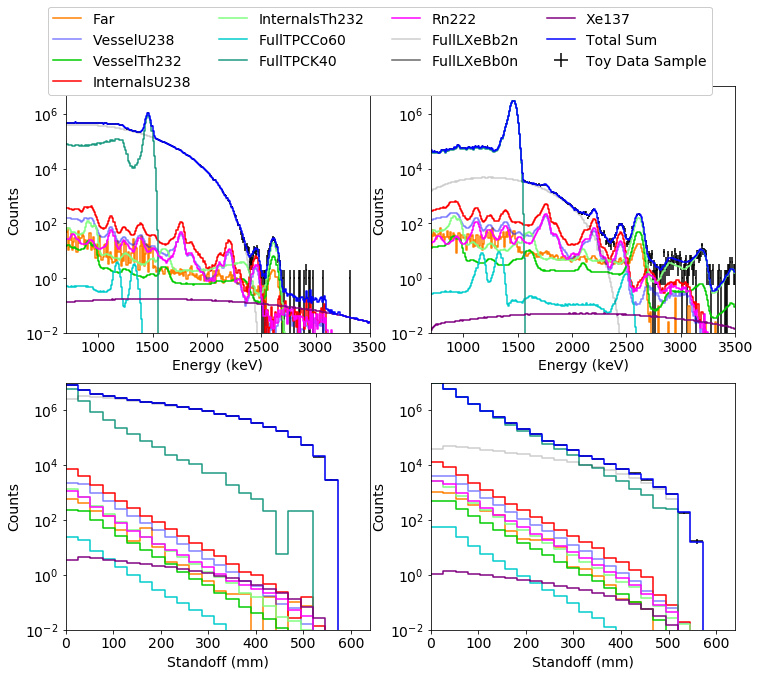

In [186]:
import importlib
importlib.reload(nEXOFitLikelihood)


# Create the likelihood object and a fake dataset
likelihood = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood.AddPDFDataframeToModel(workspace.df_group_pdfs)
likelihood.model.IncludeSignalEfficiencyVariableInFit(True)
likelihood.AddDataset( likelihood.model.GenerateDataset() )
likelihood.PlotModelDistributions(plot_data=True)
# Set the limits on the parameters
PAR_LIMITS = True
if PAR_LIMITS:
    for var in likelihood.model.variable_list:
        if 'Bb0n' in var['Name']:
            likelihood.SetVariableLimits( var['Name'], \
                                      lower_limit = -10., \
                                      upper_limit = 100.)
        else: 
            likelihood.SetVariableLimits( var['Name'], \
                                      lower_limit = 0., \
                                      upper_limit = var['Value']*10.)

likelihood.SetFractionalMinuitInputError('Num_FullLXeBb0n', 0.01/0.0001)

likelihood.PrintVariableList()

# Fill in the array of initial parameters
initial_values = np.ones(len(likelihood.model.variable_list))
for i in range(len(likelihood.model.variable_list)):
    initial_values[i] = (likelihood.model.variable_list[i]['Value'])


In [187]:


#likelihood.PrintVariableList()


num_hypotheses = 10
eff_error_vals = [0.05, 0.1, 0.2, 0.4, 0.6]

xvals = np.array([]) #np.linspace(0.,40.*(1.-num_hypotheses),num_hypotheses)

lambdas = np.zeros((len(eff_error_vals),num_hypotheses))
num_iterations = np.zeros(num_hypotheses)
best_fit_converged = True


CONSTRAINTS=True

if CONSTRAINTS:
        rn222_idx = likelihood.GetVariableIndex('Rn222')
        # Fluctuate Rn222 constraint
        rn222_constraint_val = (np.random.randn()*0.1 + 1)*initial_values[rn222_idx]
        # Set Rn222 constraint
        likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[rn222_idx]['Name'],\
                                                rn222_constraint_val, \
                                                0.1 * initial_values[rn222_idx])


for j in range(len(eff_error_vals)):
    
    eff_err = eff_error_vals[j]

    likelihood.model.UpdateVariables(initial_values)
    
    print('\n\nRunning efficiency error: {:3.3}'.format(eff_err))

    eff_idx = likelihood.GetVariableIndex('Signal_Efficiency')
    eff_constraint_val = (np.random.randn()*eff_err + 1)* initial_values[eff_idx]
    likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[eff_idx]['Name'],\
                                                    1.,\
                                                    eff_err * initial_values[eff_idx])


    # Initialize (or reset) all my output variables.
    converged = True
    num_iterations = np.ones(num_hypotheses)
    #lambdas = np.zeros(num_hypotheses)
    xvals = np.zeros(num_hypotheses)
    fixed_fit_converged = np.array([],dtype=bool)
    fixed_fit_covar = np.array([],dtype=bool)
    crossing = -1
    output_row = dict()

    
    print('\n\n')
    likelihood.PrintVariableList()
    print('\nConstraints:')
    for constraint in likelihood.model.constraints:
            print('\t{}'.format(constraint))
    print('\n')


    for i in range(num_hypotheses):
        
        signal_idx = likelihood.GetVariableIndex('Bb0n')
        new_initial_values = np.copy(initial_values)
        signal_hypothesis = float(i)*2.+0.000001
        new_initial_values[signal_idx] = signal_hypothesis
        xvals[i] = signal_hypothesis
        likelihood.SetVariableFixStatus('Num_FullLXeBb0n',True)    
        print('Hypothesis {} ({:3.3} signal counts)'.format(i,new_initial_values[signal_idx]))

        if i == 0:
            print_level=1
        else:
            print_level=0
            
        lambda_fit_result = likelihood.ComputeLambdaForPositiveSignal(initial_values=new_initial_values,\
                                                     signal_name='Bb0n',\
                                                     fixed_fit_signal_value = signal_hypothesis,\
                                                     signal_expectation=0.,\
                                                     print_level=print_level)

        lambdas[j,i] = lambda_fit_result['lambda']
        num_iterations[i] = lambda_fit_result['fixed_fit_iterations']
        fixed_fit_converged = np.append(fixed_fit_converged,lambda_fit_result['fixed_fit_converged'])
        fixed_fit_covar = np.append(fixed_fit_covar,lambda_fit_result['fixed_fit_covar'])
        if i == 9:
            likelihood.PrintVariableList()

    



Running efficiency error: 0.05



Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.882e+03    False     None       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       1.905e+04    False     None       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      2.169e+03    False     None       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.635e+04    False     None       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   8.667e+03    False     None       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      216.2        False     None       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.257e+07    False     None       5.707e+03     False          (0.0 ,325726157.48000866)
Num_Rn222             9.107e+03    False     None       95.43         True           (0.0 ,91

------------------------------------------------------------------
| FCN = -3.507                  |     Ncalls=655 (655 total)     |
| EDM = 1.45E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.507                  |     Ncalls=185 (185 total)     |
| EDM = 3.93E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -0.4105                 |    Ncalls=1127 (1131 total)    |
| EDM = 1.8E-05 (Goal: 5E-06)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -0.4105                 |     Ncalls=577 (577 total)     |
| EDM = 1.2E-05 (Goal: 5E-06)   |            u

------------------------------------------------------------------
| FCN = -4.34                   |     Ncalls=474 (474 total)     |
| EDM = 8.37E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -4.614
Hypothesis 2 (4.0 signal counts)


Fit with Num_FullLXeBb0n fixed at 4.0 cts...

------------------------------------------------------------------
| FCN = -3.966      

------------------------------------------------------------------
| FCN = -0.4995                 |     Ncalls=333 (333 total)     |
| EDM = 1.11E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -4.614
Hypothesis 9 (18.0 signal counts)


Fit with Num_FullLXeBb0n fixed at 18.0 cts...

------------------------------------------------------------------
| FCN = 0.2033    

------------------------------------------------------------------
| FCN = -3.973                  |     Ncalls=495 (495 total)     |
| EDM = 3.84E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -4.614
Hypothesis 3 (6.0 signal counts)


Fit with Num_FullLXeBb0n fixed at 6.0 cts...

------------------------------------------------------------------
| FCN = -3.536      

------------------------------------------------------------------
| FCN = -0.8343                 |     Ncalls=717 (717 total)     |
| EDM = 2.48E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -0.8344                 |     Ncalls=253 (253 total)     |
| EDM = 1.69E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -4.346                  |     Ncalls=702 (702 total)     |
| EDM = 2.55E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -4.345                  |     Ncalls=261 (261 total)     |
| EDM = 1.51E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -1.876                  |    Ncalls=1067 (1067 total)    |
| EDM = 7.12E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -4.614
Hypothesis 9 (18.0 signal counts)


Fit with Num_FullLXeBb0n fixed at 18.0 cts...

------------------------------------------------------------------
| FCN = -1.617    

------------------------------------------------------------------
| FCN = -3.745                  |     Ncalls=244 (244 total)     |
| EDM = 6.19E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -4.614
Hypothesis 4 (8.0 signal counts)


Fit with Num_FullLXeBb0n fixed at 8.0 cts...

------------------------------------------------------------------
| FCN = -3.48       

In [188]:
print(lambdas)

[[ 6.73001126e-05  5.49440119e-01  1.30138093e+00  2.21535146e+00
   3.25871161e+00  4.41481212e+00  5.66605781e+00  7.00058248e+00
   8.40824765e+00  9.88125099e+00]
 [-1.61608420e-05  5.48828871e-01  1.29807548e+00  2.20245117e+00
   3.23271088e+00  4.36599583e+00  5.58514085e+00  6.87698243e+00
   8.22977996e+00  9.63652614e+00]
 [ 1.88969742e-04  5.46627682e-01  1.28287683e+00  2.15937440e+00
   3.13296977e+00  4.17916989e+00  5.27651697e+00  6.40816965e+00
   7.55986700e+00  8.72211305e+00]
 [ 6.81576345e-05  5.37734617e-01  1.22569483e+00  1.98644283e+00
   2.76509551e+00  3.52356762e+00  4.23603367e+00  4.89006381e+00
   5.47697559e+00  5.99490629e+00]
 [ 6.79175033e-05  5.22597958e-01  1.13708108e+00  1.73892193e+00
   2.26909675e+00  2.70602732e+00  3.04707451e+00  3.30465477e+00
   3.49385975e+00  3.63064560e+00]]


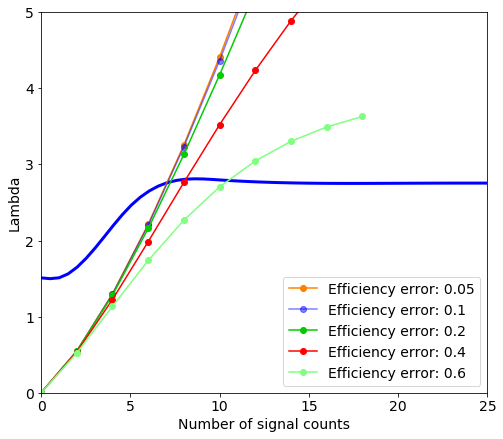

In [190]:

#plt.plot(xcounts['1percent'],ylambdas['1percent'],'-ob',markersize=4,linewidth=1)
plt.plot(xspline,SplineFunc5(xspline),'-b',linewidth=3)

for i in range(len(eff_error_vals)):
    plt.plot(xvals,lambdas[i],'-o',label='Efficiency error: {:3.3}'.format(eff_error_vals[i]))
    
plt.xlabel('Number of signal counts')
plt.ylabel('Lambda')
plt.xlim(0.,25.)
plt.ylim(0.,5.)
plt.legend()
plt.savefig('profiles_varying_signal_efficiency_error.png',dpi=200,bbox_inches='tight')



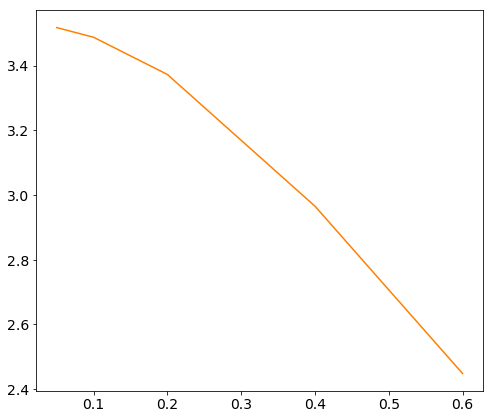

In [124]:
plt.plot(eff_error_vals,[these_lambdas[6] for these_lambdas in lambdas])

# Now let's see if the bakcground shape paramter has a similar effect.

Remember, this has units of counts.

In [153]:
# Create the workspace
workspace = nEXOFitWorkspace.nEXOFitWorkspace(config='../config/TUTORIAL_config.yaml')
workspace.LoadComponentsTableFromFile('../../tables/ComponentsTable_D-005_v25_2020-01-21.h5')
workspace.CreateGroupedPDFs()


Loading input data froma previously-generated components table....

Loaded dataframe with 130 components.
Contains the following quantities of interest:
	PDFName
	Component
	Isotope
	MC ID
	Histogram
	HistogramAxisNames
	Total Mass or Area
	Halflife
	SpecActiv
	SpecActivErr
	RawActiv
	RawActivErr
	Activity ID
	Expected Counts
	Expected Counts Err
	Expected Counts UL
	TotalHitEff_N
	TotalHitEff_K
	Group

Fit variables:
	['SS/MS', 'Energy (keV)', 'Standoff (mm)']

Creating grouped PDFs....
	Group:     	Expected Counts:
	Far        	        4882.22
	Vessel_U238 	       19053.03
	Vessel_Th232 	        2169.26
	Off        	      139350.25
	Internals_U238 	       46351.84
	Internals_Th232 	        8667.26
	FullTPC_Co60 	         216.19
	FullTPC_K40 	    32572615.75
	Rn222      	        9107.27
	FullLXeBb2n 	    27949377.02
	FullLXeBb0n 	           0.00
	Xe137      	          46.52
	Total Sum  	    60612486.34


Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting FullTPCCo60
Plotting FullTPCK40
Plotting Rn222
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.882e+03    False     None       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       1.905e+04    False     None       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      2.169e+03    False     None       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.635e+04    False     None       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   8.667e+03    False     None       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      216.2        False     None       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.25

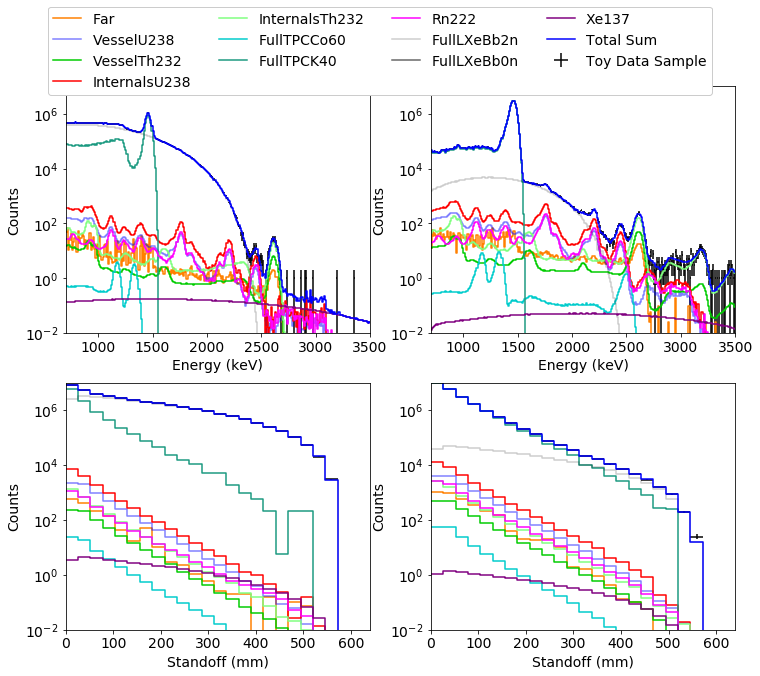

In [179]:
import importlib
importlib.reload(nEXOFitLikelihood)
importlib.reload(nEXOFitModel)


# Create the likelihood object and a fake dataset
likelihood = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood.AddPDFDataframeToModel(workspace.df_group_pdfs)
likelihood.model.IncludeBackgroundShapeVariableInFit(True)
likelihood.AddDataset( likelihood.model.GenerateDataset() )
likelihood.PlotModelDistributions(plot_data=True)
# Set the limits on the parameters
PAR_LIMITS = True
if PAR_LIMITS:
    for var in likelihood.model.variable_list:
        if 'Bb0n' in var['Name']:
            likelihood.SetVariableLimits( var['Name'], \
                                      lower_limit = -10., \
                                      upper_limit = 100.)
        elif 'Background_Shape_Error' in var['Name']:
            likelihood.SetVariableLimits( var['Name'], \
                                      lower_limit = -100., \
                                      upper_limit = 100.)
        else: 
            likelihood.SetVariableLimits( var['Name'], \
                                      lower_limit = 0., \
                                      upper_limit = var['Value']*10.)

likelihood.SetFractionalMinuitInputError('Num_FullLXeBb0n', 0.01/0.0001)

likelihood.PrintVariableList()

# Fill in the array of initial parameters
initial_values = np.ones(len(likelihood.model.variable_list))
for i in range(len(likelihood.model.variable_list)):
    initial_values[i] = (likelihood.model.variable_list[i]['Value'])


In [182]:


#likelihood.PrintVariableList()


num_hypotheses = 10
bkg_error_vals = [0.01,1.,2.,3.,4.,5.]

xvals = np.array([]) #np.linspace(0.,40.*(1.-num_hypotheses),num_hypotheses)

lambdas = np.zeros((len(bkg_error_vals),num_hypotheses))
num_iterations = np.zeros(num_hypotheses)
best_fit_converged = True


CONSTRAINTS=True

if CONSTRAINTS:
        rn222_idx = likelihood.GetVariableIndex('Rn222')
        # Fluctuate Rn222 constraint
        rn222_constraint_val = (np.random.randn()*0.1 + 1)*initial_values[rn222_idx]
        # Set Rn222 constraint
        likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[rn222_idx]['Name'],\
                                                rn222_constraint_val, \
                                                0.1 * initial_values[rn222_idx])


for j in range(len(bkg_error_vals)):
    
    bkg_err = bkg_error_vals[j]

    likelihood.model.UpdateVariables(initial_values)
    
    print('\n\nRunning background shape error error: {:3.3}'.format(bkg_err))

    bkg_idx = likelihood.GetVariableIndex('Background_Shape_Error')
    bkg_constraint_val = (np.random.randn()*bkg_err + 1)* initial_values[bkg_idx]
    likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[bkg_idx]['Name'],\
                                                    0.,\
                                                    bkg_err)


    # Initialize (or reset) all my output variables.
    converged = True
    num_iterations = np.ones(num_hypotheses)
    #lambdas = np.zeros(num_hypotheses)
    xvals = np.zeros(num_hypotheses)
    fixed_fit_converged = np.array([],dtype=bool)
    fixed_fit_covar = np.array([],dtype=bool)
    crossing = -1
    output_row = dict()

    
    print('\n\n')
    likelihood.PrintVariableList()
    print('\nConstraints:')
    for constraint in likelihood.model.constraints:
            print('\t{}'.format(constraint))
    print('\n')


    for i in range(num_hypotheses):
        
        signal_idx = likelihood.GetVariableIndex('Bb0n')
        new_initial_values = np.copy(initial_values)
        signal_hypothesis = float(i)*2.+0.000001
        new_initial_values[signal_idx] = signal_hypothesis
        xvals[i] = signal_hypothesis
        likelihood.SetVariableFixStatus('Num_FullLXeBb0n',True)    
        print('Hypothesis {} ({:3.3} signal counts)'.format(i,new_initial_values[signal_idx]))

        if i == 0:
            print_level=1
            repeat_best_fit=True
        else:
            print_level=0
            
        lambda_fit_result = likelihood.ComputeLambdaForPositiveSignal(initial_values=new_initial_values,\
                                                     signal_name='Bb0n',\
                                                     fixed_fit_signal_value = signal_hypothesis,\
                                                     signal_expectation=0.,\
                                                     print_level=print_level,\
                                                     repeat_best_fit=repeat_best_fit)

        lambdas[j,i] = lambda_fit_result['lambda']
        num_iterations[i] = lambda_fit_result['fixed_fit_iterations']
        fixed_fit_converged = np.append(fixed_fit_converged,lambda_fit_result['fixed_fit_converged'])
        fixed_fit_covar = np.append(fixed_fit_covar,lambda_fit_result['fixed_fit_covar'])

        
        likelihood.PrintVariableList()




Running background shape error error: 0.01



Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.882e+03    False     4431       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       1.905e+04    False     2627       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      2.169e+03    False     626.       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.635e+04    False     4627       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   8.667e+03    False     1079       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      216.2        False     1525       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.257e+07    False     3900       5.707e+03     False          (0.0 ,325726157.48000866)
Num_Rn222             9.107e+03    False     2242       95.43         True       

------------------------------------------------------------------
| FCN = -3.085                  |     Ncalls=468 (468 total)     |
| EDM = 1.42E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.085                  |     Ncalls=349 (349 total)     |
| EDM = 8.94E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.085                  |     Ncalls=473 (473 total)     |
| EDM = 2.35E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.085                  |     Ncalls=341 (341 total)     |
| EDM = 1.48E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -2.651                  |     Ncalls=470 (470 total)     |
| EDM = 9.61E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -2.651                  |     Ncalls=438 (438 total)     |
| EDM = 2.53E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=598 (598 total)     |
| EDM = 4.27E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=556 (556 total)     |
| EDM = 4.56E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=598 (598 total)     |
| EDM = 4.27E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=714 (714 total)     |
| EDM = 2.57E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.085                  |     Ncalls=473 (473 total)     |
| EDM = 2.35E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.084                  |     Ncalls=192 (192 total)     |
| EDM = 8.32E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.085                  |     Ncalls=326 (326 total)     |
| EDM = 9.31E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -3.085                  |     Ncalls=460 (460 total)     |
| EDM = 2.63E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=572 (572 total)     |
| EDM = 3.58E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 5
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=795 (795 total)     |
| EDM = 2.74E-06 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = 0.3465                  |     Ncalls=749 (749 total)     |
| EDM = 3.91E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 6
------------------------------------------------------------------
| FCN = 0.3465                  |     Ncalls=671 (671 total)     |
| EDM = 3.94E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = 0.9912                  |     Ncalls=848 (848 total)     |
| EDM = 4.44E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 4
------------------------------------------------------------------
| FCN = 0.9912                  |     Ncalls=510 (510 total)     |
| EDM = 4.9E-05 (Goal: 5E-06)   |            u

------------------------------------------------------------------
| FCN = -3.086                  |     Ncalls=496 (496 total)     |
| EDM = 2.88E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.086
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.629e+03    False     960.       69.87        

------------------------------------------------------------------
| FCN = -2.93                   |     Ncalls=452 (452 total)     |
| EDM = 7.57E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.086
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.622e+03    False     1193       69.87        

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=853 (853 total)     |
| EDM = 7.02E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=879 (879 total)     |
| EDM = 7.89E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.086                  |     Ncalls=496 (496 total)     |
| EDM = 2.88E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.086


Fit with Num_FullLXeBb0n fixed at 8.0 cts...

------------------------------------------------------------------
| FCN = -1.878                  |     Ncalls=484 (484

------------------------------------------------------------------
| FCN = -1.397                  |     Ncalls=654 (654 total)     |
| EDM = 2.04E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.086
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.582e+03    False     797.       69.87        

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=853 (853 total)     |
| EDM = 7.02E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=474 (474 total)     |
| EDM = 9.64E-06 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=853 (853 total)     |
| EDM = 7.02E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=356 (356 total)     |
| EDM = 7.9E-05 (Goal: 5E-06)   |            u

------------------------------------------------------------------
| FCN = 0.3117                  |    Ncalls=1363 (1363 total)    |
| EDM = 1.7E-05 (Goal: 5E-06)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 9
------------------------------------------------------------------
| FCN = 0.3117                  |     Ncalls=855 (858 total)     |
| EDM = 1.53E-08 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=571 (571 total)     |
| EDM = 6.71E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=417 (417 total)     |
| EDM = 3.46E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.088                  |     Ncalls=474 (474 total)     |
| EDM = 6.73E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.088                  |     Ncalls=583 (583 total)     |
| EDM = 4.78E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -2.942                  |     Ncalls=785 (785 total)     |
| EDM = 1.1E-05 (Goal: 5E-06)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.088
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.622e+03    False     1002       69.87        

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=571 (571 total)     |
| EDM = 6.71E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=983 (983 total)     |
| EDM = 6.77E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.088                  |     Ncalls=508 (508 total)     |
| EDM = 2.25E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.088


Fit with Num_FullLXeBb0n fixed at 8.0 cts...

------------------------------------------------------------------
| FCN = -1.932                  |     Ncalls=484 (484

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=585 (585 total)     |
| EDM = 4.29E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=204 (204 total)     |
| EDM = 3.4E-05 (Goal: 5E-06)   |            u

------------------------------------------------------------------
| FCN = -3.088                  |     Ncalls=508 (508 total)     |
| EDM = 2.25E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.088


Fit with Num_FullLXeBb0n fixed at 14.0 cts...

------------------------------------------------------------------
| FCN = -0.387                  |     Ncalls=573 (57

------------------------------------------------------------------
| FCN = 0.2099                  |     Ncalls=768 (768 total)     |
| EDM = 7.23E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = 0.2099                  |     Ncalls=994 (994 total)     |
| EDM = 8.27E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=882 (882 total)     |
| EDM = 4.9E-05 (Goal: 5E-06)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=826 (826 total)     |
| EDM = 1.86E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.09                   |     Ncalls=654 (654 total)     |
| EDM = 5.34E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.09
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.63e+03     False     1017       69.87         

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=975 (975 total)     |
| EDM = 4.47E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=441 (441 total)     |
| EDM = 5.64E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -2.402                  |     Ncalls=482 (482 total)     |
| EDM = 5.87E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -2.402                  |     Ncalls=749 (749 total)     |
| EDM = 2.13E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=975 (975 total)     |
| EDM = 4.47E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=365 (365 total)     |
| EDM = 7.74E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -1.07                   |     Ncalls=775 (775 total)     |
| EDM = 4.41E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -1.07                   |     Ncalls=194 (194 total)     |
| EDM = 1.51E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -0.5302                 |     Ncalls=532 (532 total)     |
| EDM = 1.89E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -0.5302                 |     Ncalls=937 (937 total)     |
| EDM = 5.86E-06 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=975 (975 total)     |
| EDM = 4.47E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=557 (557 total)     |
| EDM = 1.1E-05 (Goal: 5E-06)   |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=556 (556 total)     |
| EDM = 2.43E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Best fit result NLL: -3.106
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.63e+03     False     985.       69.87        

------------------------------------------------------------------
| FCN = -2.978                  |     Ncalls=608 (608 total)     |
| EDM = 8.16E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.093
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.627e+03    False     874.       69.87        

------------------------------------------------------------------
| FCN = -2.475                  |    Ncalls=1128 (1128 total)    |
| EDM = 3.13E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.093
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.612e+03    False     889.       69.87        

------------------------------------------------------------------
| FCN = -1.697                  |     Ncalls=368 (368 total)     |
| EDM = 2.26E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.093
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.594e+03    False     1212       69.87        

------------------------------------------------------------------
| FCN = -3.093                  |     Ncalls=490 (490 total)     |
| EDM = 5.27E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.093


Fit with Num_FullLXeBb0n fixed at 14.0 cts...

------------------------------------------------------------------
| FCN = -0.7151                 |     Ncalls=541 (54

------------------------------------------------------------------
| FCN = -0.1626                 |    Ncalls=1218 (1218 total)    |
| EDM = 1.48E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 6
------------------------------------------------------------------
| FCN = -0.1624                 |     Ncalls=362 (362 total)     |
| EDM = 6.31E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = 0.4254                  |     Ncalls=671 (671 total)     |
| EDM = 9.65E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = 0.4254                  |    Ncalls=1080 (1080 total)    |
| EDM = 1.08E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=358 (358 total)     |
| EDM = 8.93E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 4
------------------------------------------------------------------
| FCN = -3.106                  |    Ncalls=1658 (1658 total)    |
| EDM = 2.34E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.095                  |     Ncalls=509 (509 total)     |
| EDM = 1.26E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.095
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.628e+03    False     941.       69.87        

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=771 (771 total)     |
| EDM = 8.35E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=270 (270 total)     |
| EDM = 1.52E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -3.095                  |     Ncalls=822 (822 total)     |
| EDM = 1.15E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.095


Fit with Num_FullLXeBb0n fixed at 6.0 cts...

------------------------------------------------------------------
| FCN = -2.552                  |     Ncalls=499 (499

------------------------------------------------------------------
| FCN = -2.226                  |     Ncalls=466 (466 total)     |
| EDM = 2.19E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.095
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.608e+03    False     907.       69.87        

------------------------------------------------------------------
| FCN = -1.842                  |     Ncalls=690 (690 total)     |
| EDM = 3.96E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -1.842                  |     Ncalls=428 (428 total)     |
| EDM = 3E-05 (Goal: 5E-06)     |            u

------------------------------------------------------------------
| FCN = -1.407                  |     Ncalls=863 (863 total)     |
| EDM = 3.08E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Zero fit result NLL: -3.095
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.591e+03    False     952.       69.87        

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=771 (771 total)     |
| EDM = 8.35E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -3.105                  |     Ncalls=322 (322 total)     |
| EDM = 7.9E-05 (Goal: 5E-06)   |            u

------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=329 (329 total)     |
| EDM = 2.77E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -3.106                  |     Ncalls=669 (669 total)     |
| EDM = 1.17E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = 0.1492                  |     Ncalls=728 (728 total)     |
| EDM = 3.08E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 9
------------------------------------------------------------------
| FCN = 0.1491                  |    Ncalls=2009 (2009 total)    |
| EDM = 3.41E-06 (Goal: 5E-06)  |            u

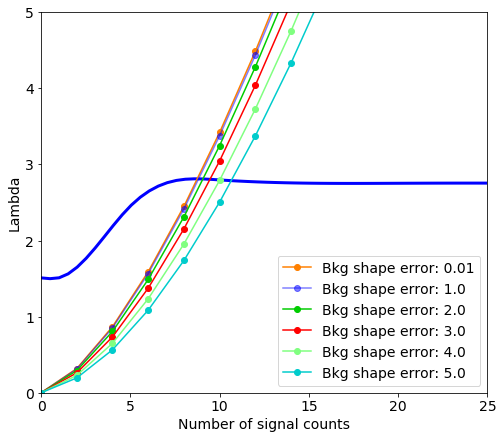

In [184]:

#plt.plot(xcounts['1percent'],ylambdas['1percent'],'-ob',markersize=4,linewidth=1)
plt.plot(xspline,SplineFunc5(xspline),'-b',linewidth=3)

for i in range(len(bkg_error_vals)):
    plt.plot(xvals,lambdas[i],'-o',label='Bkg shape error: {:3.3}'.format(bkg_error_vals[i]))
    
plt.xlabel('Number of signal counts')
plt.ylabel('Lambda')
plt.xlim(0.,25.)
plt.ylim(0.,5.)
plt.legend()
plt.savefig('profiles_varying_background_shape_error.png',dpi=200,bbox_inches='tight')


In [169]:
print(lambdas)

[[0.1171581 ]
 [0.09108221]]


# Now let's see how the profile likelihood changes with and without the constraints going negative.

Plotting Far
Plotting VesselU238
Plotting VesselTh232
Plotting InternalsU238
Plotting InternalsTh232
Plotting FullTPCCo60
Plotting FullTPCK40
Plotting Rn222
Plotting FullLXeBb2n
Plotting FullLXeBb0n
Plotting Xe137
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.882e+03    False     None       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       1.905e+04    False     None       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      2.169e+03    False     None       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.635e+04    False     None       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   8.667e+03    False     None       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      216.2        False     None       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.25

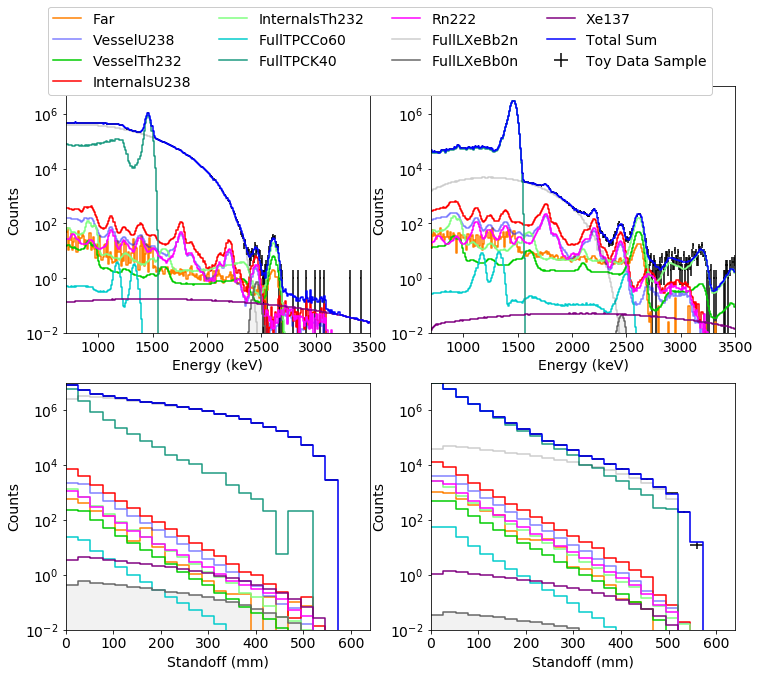

In [91]:
import importlib
importlib.reload(nEXOFitLikelihood)



# Create the likelihood object and a fake dataset
likelihood = nEXOFitLikelihood.nEXOFitLikelihood()
likelihood.AddPDFDataframeToModel(workspace.df_group_pdfs)
likelihood.model.IncludeSignalEfficiencyVariableInFit(True)
likelihood.model.GenerateModelDistribution()

sig_idx = likelihood.model.GetVariableIndexByName('Bb0n')
input_values = likelihood.GetVariableValues()
input_values[ likelihood.GetVariableIndex('Bb0n') ] = 5.
likelihood.model.UpdateVariables(input_values)
likelihood.model.GenerateModelDistribution()

likelihood.AddDataset( likelihood.model.GenerateDataset() )

likelihood.PlotModelDistributions(plot_data=True)
# Set the limits on the parameters
PAR_LIMITS = True
if PAR_LIMITS:
    for var in likelihood.model.variable_list:
        if 'Bb0n' in var['Name']:
            likelihood.SetVariableLimits( var['Name'], \
                                      lower_limit = -20., \
                                      upper_limit = 100.)
        else: 
            likelihood.SetVariableLimits( var['Name'], \
                                      lower_limit = 0., \
                                      upper_limit = var['Value']*10.)

likelihood.SetFractionalMinuitInputError('Num_FullLXeBb0n', 0.01/0.0001)

likelihood.PrintVariableList()

# Fill in the array of initial parameters
initial_values = np.ones(len(likelihood.model.variable_list))
for i in range(len(likelihood.model.variable_list)):
    initial_values[i] = (likelihood.model.variable_list[i]['Value'])
    
#plt.savefig('sensitivity_plot_mockup.png',dpi=150,bbox_inches='tight')

In [92]:
likelihood.PenalizeNegativeBins(value=False)

#likelihood.PrintVariableList()


num_hypotheses = 20

xvals = np.array([]) #np.linspace(0.,40.*(1.-num_hypotheses),num_hypotheses)

lambdas = np.zeros(num_hypotheses)
num_iterations = np.zeros(num_hypotheses)
best_fit_converged = True

eff_err = 0.05


CONSTRAINTS=True


if True:
    

    likelihood.model.UpdateVariables(initial_values)
    
    print('\n\nRunning efficiency error: {:3.3}'.format(eff_err))
    
    if CONSTRAINTS:
        rn222_idx = likelihood.GetVariableIndex('Rn222')
        # Fluctuate Rn222 constraint
        rn222_constraint_val = (np.random.randn()*0.1 + 1)*initial_values[rn222_idx]
        # Set Rn222 constraint
        likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[rn222_idx]['Name'],\
                                                rn222_constraint_val, \
                                                0.1 * initial_values[rn222_idx])
        eff_idx = likelihood.GetVariableIndex('Signal_Efficiency')
        eff_constraint_val = (np.random.randn()*eff_err + 1.)
        likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[eff_idx]['Name'],\
                                                    eff_constraint_val,\
                                                    eff_err * initial_values[eff_idx])


    # Initialize (or reset) all my output variables.
    converged = True
    num_iterations = np.ones(num_hypotheses)
    #lambdas = np.zeros(num_hypotheses)
    xvals = np.zeros(num_hypotheses)
    fixed_fit_converged = np.array([],dtype=bool)
    fixed_fit_covar = np.array([],dtype=bool)
    crossing = -1
    output_row = dict()

    
    print('\n\n')
    likelihood.PrintVariableList()
    print('\nConstraints:')
    for constraint in likelihood.model.constraints:
            print('\t{}'.format(constraint))
    print('\n')

    for i in range(num_hypotheses):

    
    
        signal_idx = likelihood.GetVariableIndex('Bb0n')
        new_initial_values = np.copy(initial_values)
        signal_hypothesis = float(i)*2.+0.000001-20.
        new_initial_values[signal_idx] = signal_hypothesis
        xvals[i] = signal_hypothesis
        likelihood.SetVariableFixStatus('Num_FullLXeBb0n',True)    

        if i == 0:
            print_level=1
        else:
            print_level=0
            
        lambda_fit_result = likelihood.ComputeLambdaForPositiveSignal(initial_values=new_initial_values,\
                                                     signal_name='Bb0n',\
                                                     fixed_fit_signal_value = signal_hypothesis,\
                                                     signal_expectation=0.,\
                                                     print_level=print_level)

        # Note, the 2 is positive here becuase fval is the *negative* log-likelihood
        # Lambda is defined as -2 * ln( L_fixed / L_best )
        lambdas[i] = lambda_fit_result['lambda']
        num_iterations[i] = lambda_fit_result['fixed_fit_iterations']
        fixed_fit_converged = np.append(fixed_fit_converged,lambda_fit_result['fixed_fit_converged'])
        fixed_fit_covar = np.append(fixed_fit_covar,lambda_fit_result['fixed_fit_covar'])
        likelihood.PrintVariableList()




Running efficiency error: 0.05



Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.882e+03    False     None       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       1.905e+04    False     None       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      2.169e+03    False     None       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.635e+04    False     None       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   8.667e+03    False     None       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      216.2        False     None       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.257e+07    False     None       5.707e+03     False          (0.0 ,325726157.48000866)
Num_Rn222             9.107e+03    False     None       95.43         True           (0.0 ,91

------------------------------------------------------------------
| FCN = -16.78                  |    Ncalls=1831 (1842 total)    |
| EDM = 1.97E+06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -16.48                  |    Ncalls=1559 (1570 total)    |
| EDM = 0.122 (Goal: 5E-06)     |            u

------------------------------------------------------------------
| FCN = -10.13                  |     Ncalls=846 (846 total)     |
| EDM = 1.32E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 3
------------------------------------------------------------------
| FCN = -10.46                  |     Ncalls=685 (696 total)     |
| EDM = 13.9 (Goal: 5E-06)      |            u

------------------------------------------------------------------
| FCN = -9.939                  |     Ncalls=410 (421 total)     |
| EDM = 5.78E+04 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 4
------------------------------------------------------------------
| FCN = -4.041                  |     Ncalls=565 (565 total)     |
| EDM = 1.4E-05 (Goal: 5E-06)   |            u

------------------------------------------------------------------
| FCN = -8.566                  |     Ncalls=713 (713 total)     |
| EDM = 9.34E-07 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -8.565                  |     Ncalls=297 (297 total)     |
| EDM = 2.06E-05 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -9.67                   |     Ncalls=638 (638 total)     |
| EDM = 3.37E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               3.372e+03    False     1065       69.87         False          (0.0 ,48822.

------------------------------------------------------------------
| FCN = -9.707                  |     Ncalls=529 (529 total)     |
| EDM = 5.39E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   False   |  True  |
------------------------------------------------------------------
Fit iteration 2
------------------------------------------------------------------
| FCN = -9.707                  |     Ncalls=589 (589 total)     |
| EDM = 3.47E-06 (Goal: 5E-06)  |            u

------------------------------------------------------------------
| FCN = -8.835                  |     Ncalls=530 (530 total)     |
| EDM = 1.64E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               3.279e+03    False     1053       69.87         False          (0.0 ,48822.

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1. 2. 4. 2. 4. 2. 4. 1. 2. 2. 2. 3. 1. 3. 1. 2. 1. 1. 1. 1.]


(-1.0, 5.0)

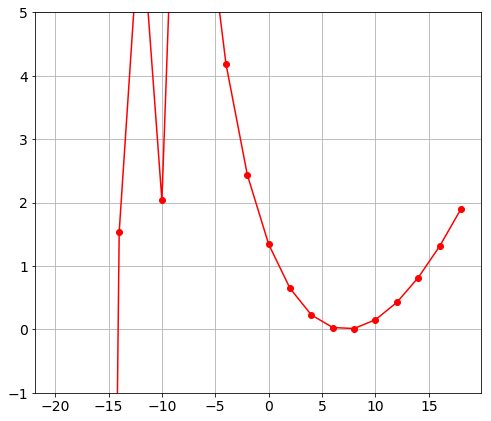

In [93]:
plt.plot(xvals,lambdas,'-or')
print(fixed_fit_covar)
print(num_iterations)
plt.grid()
nopen_lambdas = lambdas
nopen_xvals= xvals

plt.ylim(-1.,5.)

In [95]:
likelihood.PenalizeNegativeBins(value=True)
#likelihood.PrintVariableList()


num_hypotheses = 20

xvals = np.array([]) #np.linspace(0.,40.*(1.-num_hypotheses),num_hypotheses)

lambdas = np.zeros(num_hypotheses)
num_iterations = np.zeros(num_hypotheses)
best_fit_converged = True

eff_err = 0.05


CONSTRAINTS=True


if True:
    

    likelihood.model.UpdateVariables(initial_values)
    
    print('\n\nRunning efficiency error: {:3.3}'.format(eff_err))
    
    if CONSTRAINTS:
        rn222_idx = likelihood.GetVariableIndex('Rn222')
        # Fluctuate Rn222 constraint
        #rn222_constraint_val = (np.random.randn()*0.1 + 1)*initial_values[rn222_idx]
        # Set Rn222 constraint
        likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[rn222_idx]['Name'],\
                                                rn222_constraint_val, \
                                                0.1 * initial_values[rn222_idx])
        eff_idx = likelihood.GetVariableIndex('Signal_Efficiency')
        #eff_constraint_val = (np.random.randn()*eff_err + 1.)
        likelihood.SetGaussianConstraintAbsolute(likelihood.model.variable_list[eff_idx]['Name'],\
                                                    eff_constraint_val,\
                                                    eff_err * initial_values[eff_idx])

    # Initialize (or reset) all my output variables.
    converged = True
    num_iterations = np.ones(num_hypotheses)
    #lambdas = np.zeros(num_hypotheses)
    xvals = np.zeros(num_hypotheses)
    fixed_fit_converged = np.array([],dtype=bool)
    fixed_fit_covar = np.array([],dtype=bool)
    crossing = -1
    output_row = dict()

    
    print('\n\n')
    likelihood.PrintVariableList()
    print('\nConstraints:')
    for constraint in likelihood.model.constraints:
            print('\t{}'.format(constraint))
    print('\n')

    for i in range(num_hypotheses):
        signal_idx = likelihood.GetVariableIndex('Bb0n')
        new_initial_values = np.copy(initial_values)
        signal_hypothesis = float(i)*2.+0.000001-20.
        new_initial_values[signal_idx] = signal_hypothesis
        xvals[i] = signal_hypothesis
        likelihood.SetVariableFixStatus('Num_FullLXeBb0n',True)    

        if i == 0:
            print_level=1
        else:
            print_level=0
            
        lambda_fit_result = likelihood.ComputeLambda(initial_values=new_initial_values,\
                                                     signal_name='Bb0n',\
                                                     fixed_fit_signal_value = signal_hypothesis,\
                                                     signal_expectation=5.,\
                                                     print_level=print_level)

        # Note, the 2 is positive here becuase fval is the *negative* log-likelihood
        # Lambda is defined as -2 * ln( L_fixed / L_best )
        lambdas[i] = lambda_fit_result['lambda']
        num_iterations[i] = lambda_fit_result['fixed_fit_iterations']
        fixed_fit_converged = np.append(fixed_fit_converged,lambda_fit_result['fixed_fit_converged'])
        fixed_fit_covar = np.append(fixed_fit_covar,lambda_fit_result['fixed_fit_covar'])
        likelihood.PrintVariableList()



Running efficiency error: 0.05



Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               4.882e+03    False     1041       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       1.905e+04    False     4769       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      2.169e+03    False     666.       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.635e+04    False     4260       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   8.667e+03    False     755.       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      216.2        False     306.       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.257e+07    False     6116       5.707e+03     False          (0.0 ,325726157.48000866)
Num_Rn222             9.107e+03    False     686.       95.43         True           (0.0 ,91

Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               3.317e+03    False     849.       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       2.819e+04    False     1814       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      889.5        False     291.       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.027e+04    False     1708       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   1.072e+04    False     363.       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      627.0        False     313.       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.257e+07    False     6107       5.707e+03     False          (0.0 ,325726157.48000866)
Num_Rn222             9.701e+03    False     450.       95.43         True           (0.0 ,91072.67168202484)
Num_FullLXeBb2n    

Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               3.399e+03    False     1059       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       2.595e+04    False     2379       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      907.7        False     591.       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.219e+04    False     2528       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   1.069e+04    False     617.       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      623.5        False     337.       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.257e+07    False     6110       5.707e+03     False          (0.0 ,325726157.48000866)
Num_Rn222             9.602e+03    False     728.       95.43         True           (0.0 ,91072.67168202484)
Num_FullLXeBb2n    

Variable name:        Value:       IsFixed:  FitError   InputError:   IsConstrained: Limits:      
Num_Far               3.32e+03     False     1060       69.87         False          (0.0 ,48822.15158717998)
Num_Vessel_U238       2.555e+04    False     3150       138.0         False          (0.0 ,190530.2605959463)
Num_Vessel_Th232      929.3        False     736.       46.58         False          (0.0 ,21692.59708083749)
Num_Internals_U238    4.252e+04    False     3314       215.3         False          (0.0 ,463518.4165649111)
Num_Internals_Th232   1.068e+04    False     807.       93.1          False          (0.0 ,86672.56708537013)
Num_FullTPC_Co60      631.3        False     336.       14.7          False          (0.0 ,2161.8837805932717)
Num_FullTPC_K40       3.257e+07    False     6155       5.707e+03     False          (0.0 ,325726157.48000866)
Num_Rn222             9.585e+03    False     774.       95.43         True           (0.0 ,91072.67168202484)
Num_FullLXeBb2n    

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[ 2.  3. 10.  2.  3.  1.  3.  2.  1.  1.  2.  2.  1.  2.  1.  4.  1.  1.
  1.  1.]


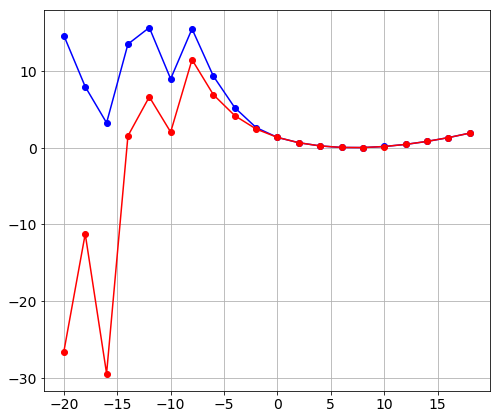

In [96]:
plt.plot(xvals,lambdas,'-ob')
plt.plot(nopen_xvals,nopen_lambdas,'-or')
print(fixed_fit_covar)
print(num_iterations)
plt.grid()